In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from src.simulation import SolarCellSim
from src.light_model import generate_carriers
from src.field import ElectricField
import src.utils

field = ElectricField(1.0)
carriers = generate_carriers(50, 1e-8, 1e-6)
sim = SolarCellSim(carriers, field, dt = 0.01, steps = 50)


sim.run()

trajectory = sim.trajectory


[TIMEIT] Function 'run' ran in 0.014002s


In [87]:
final_step = trajectory[-1]

electron_x = [x for particle, x in final_step if particle == 'electron']
hole_x = [x for particle, x in final_step if particle == 'hole']

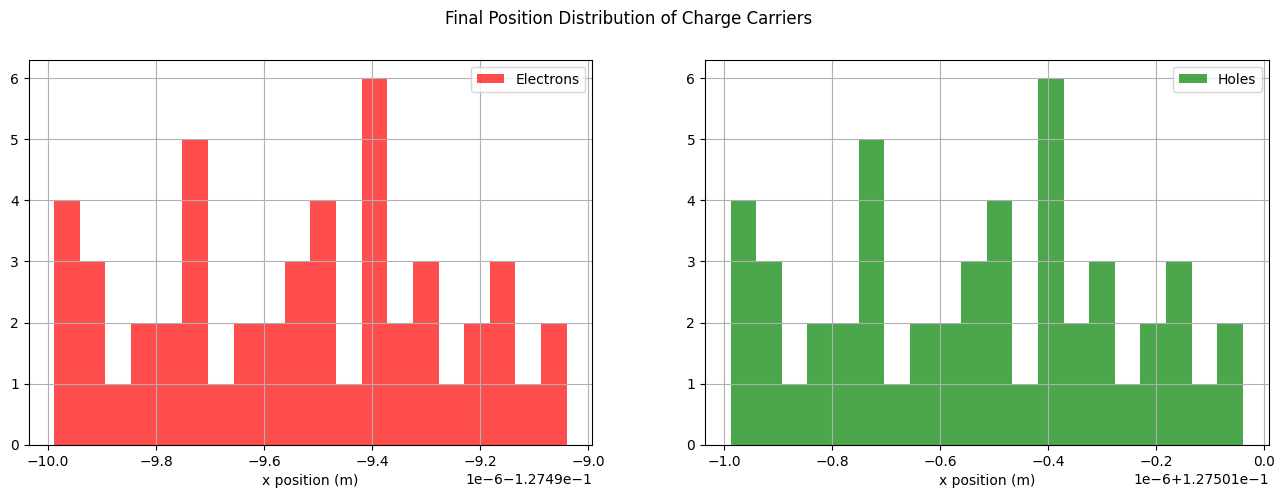

In [88]:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
#plt.figure(figsize = (8,6))
#plt.hist(electron_x, label = 'Electrons')
axs[1].hist(hole_x, alpha = 0.7, bins = 20, color = 'green', label = 'Holes')
axs[1].set_xlabel("x position (m)")
axs[1].legend()
axs[1].grid(True)

axs[0].hist(electron_x, alpha = 0.7, color = 'red', bins = 20, label = 'Electrons')
axs[0].set_xlabel("x position (m)")
axs[0].legend()
axs[0].grid(True)

plt.suptitle("Final Position Distribution of Charge Carriers")
plt.show()


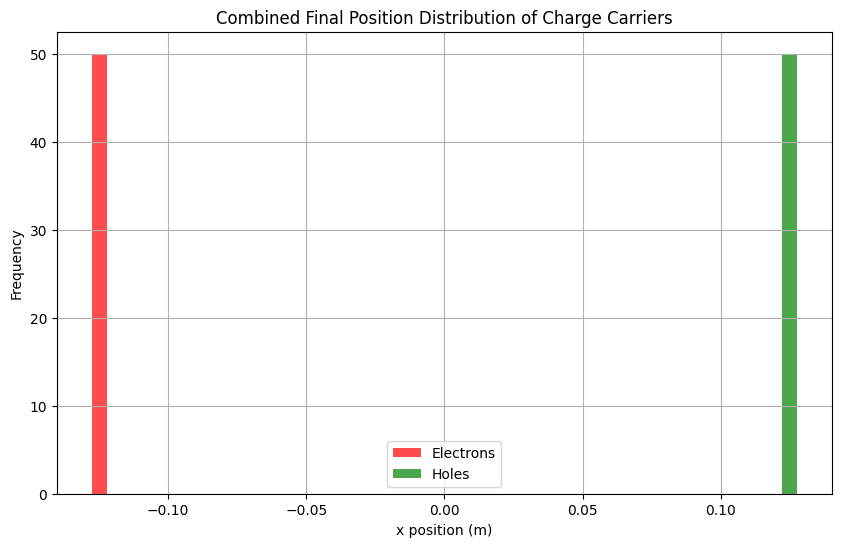

In [89]:
# Calculate common bins
all_data = np.concatenate([electron_x, hole_x])
min_val = np.min(all_data)
max_val = np.max(all_data)
bins = np.linspace(min_val, max_val, 50) 

plt.figure(figsize=(10, 6)) 

plt.hist(electron_x, alpha=0.7, color='red', bins=bins, label='Electrons')
plt.hist(hole_x, alpha=0.7, bins=bins, color='green', label='Holes')

plt.xlabel("x position (m)")
plt.ylabel("Frequency")
plt.title("Combined Final Position Distribution of Charge Carriers")
plt.legend()
plt.grid(True)


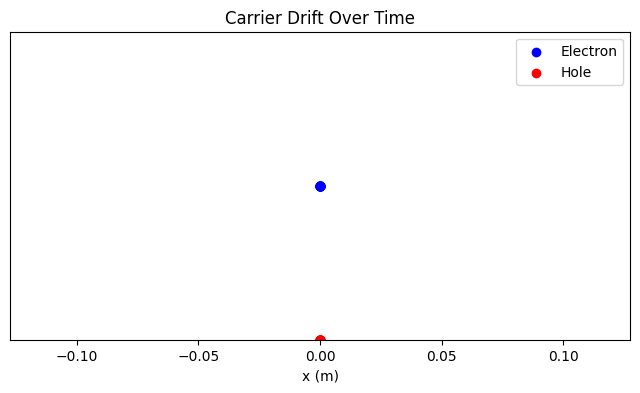

In [100]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8, 4))
electron_scatter = ax.scatter([], [], color='blue', label='Electron')
hole_scatter = ax.scatter([], [], color='red', label='Hole')
ax.set_xlim(min_val, max_val)
ax.set_ylim(0, 2)
ax.set_title("Carrier Drift Over Time")
ax.set_xlabel("x (m)")
ax.set_yticks([])  
ax.legend()

def update(frame):
    step = trajectory[frame]
    electron_x = [x for kind, x in step if kind == 'electron']
    hole_x = [x for kind, x in step if kind == 'hole']
    electron_scatter.set_offsets(np.c_[electron_x, [1]*len(electron_x)])
    hole_scatter.set_offsets(np.c_[hole_x, [0]*len(hole_x)])
    return electron_scatter, hole_scatter

ani = FuncAnimation(fig, update, frames=len(trajectory), interval=200, blit=True)
plt.show()


In [97]:
ani.save('data/output/1d_drift_animation.mp4', writer='ffmpeg', fps=30)

ValueError: unknown file extension: .mp4